In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 81.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 보훈공공데이터 공모전/데이터/독립기념관_관람객수(일별)_20250530.csv', encoding = 'cp949')
df

,일자,관람객수
0,1987-09-04,30028
1,1987-09-05,24127
2,1987-09-06,45293
3,1987-09-08,37625
4,1987-09-09,26344
...,...,...
13247,2025-05-26,1303
13248,2025-05-27,2019
13249,2025-05-28,2679
13250,2025-05-29,4145


In [ ]:
# 1987 년 정보 제외 후 월별로 관람객수 정리
df['일자'] = pd.to_datetime(df['일자'])
data = df[df['일자'].dt.year != 1987]

monthly_sum = data.groupby(data['일자'].dt.to_period('M'))['관람객수'].sum().reset_index()
monthly_sum

,일자,관람객수
0,1988-01,295731
1,1988-02,237922
2,1988-03,425473
3,1988-04,717972
4,1988-05,736798
...,...,...
444,2025-01,67497
445,2025-02,56564
446,2025-03,110633
447,2025-04,92244


In [ ]:
# 코로나19 영향으로 2020-03, 2020-09에 관람객수 0임을 확인
monthly_sum[monthly_sum['관람객수'] == 0]

,일자,관람객수
386,2020-03,0
392,2020-09,0


### 1. 월별 방문 관람객수 확인

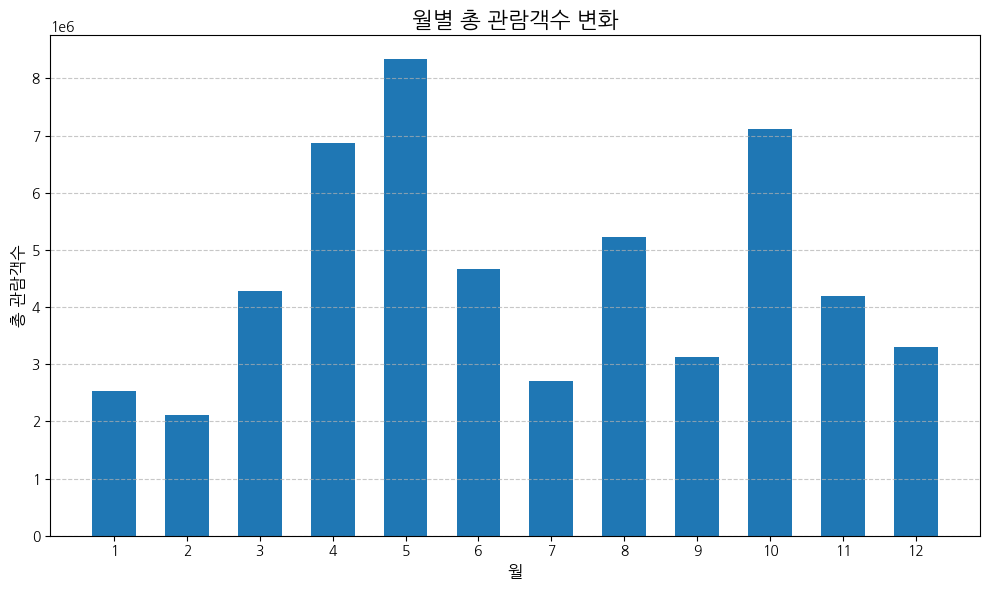

In [ ]:
monthly_sum['일자'] = monthly_sum['일자'].dt.to_timestamp()
monthly_sum['월'] = monthly_sum['일자'].dt.month

monthlycount = monthly_sum.groupby('월')['관람객수'].sum().reset_index()
monthlycount = monthlycount.sort_values('관람객수', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(monthlycount['월'], monthlycount['관람객수'], width=0.6)

plt.title('월별 총 관람객수 변화', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 관람객수', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 2. 단체 관람객수 확인

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 보훈공공데이터 공모전/데이터/독립기념관_단체관람객 수_20211231.csv', encoding = 'cp949')
df_all

,순번,연월,단체관람객수
0,1,1987-09,24421
1,2,1987-10,241419
2,3,1987-11,124795
3,4,1987-12,115719
4,5,1988-01,15696
...,...,...,...
407,408,2021-08,4747
408,409,2021-09,5471
409,410,2021-10,8655
410,411,2021-11,8443


In [ ]:
# 단체 관람객수와 일일 관람객수 데이터 합치기
df_all['연월'] = pd.to_datetime(df_all['연월'])
df_merged = pd.merge(
    monthly_sum,
    df_all[['연월', '단체관람객수']].rename(columns={'연월': '일자'}),
    on='일자',
    how='left'
)
df_merged

,일자,관람객수,월,단체관람객수
0,1988-01-01,295731,1,15696.0
1,1988-02-01,237922,2,86526.0
2,1988-03-01,425473,3,71815.0
3,1988-04-01,717972,4,196901.0
4,1988-05-01,736798,5,262934.0
...,...,...,...,...
444,2025-01-01,67497,1,NaN
445,2025-02-01,56564,2,NaN
446,2025-03-01,110633,3,NaN
447,2025-04-01,92244,4,NaN


In [ ]:
# 단체관람객수와 관람객수 차이 비교
df_clean = df_merged.dropna(subset=['단체관람객수'])
df_clean['개인관람객수'] = df_clean['관람객수'] - df_clean['단체관람객수']

mon_individual = df_clean.groupby('월')['개인관람객수'].sum().reset_index()
mon_group = df_clean.groupby('월')['단체관람객수'].sum().reset_index()
mon_all = df_clean.groupby('월')['관람객수'].sum().reset_index()

mon_total = mon_all.merge(mon_group, on='월').merge(mon_individual, on='월')
mon_total

/tmp/ipython-input-10-4247400701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['개인관람객수'] = df_clean['관람객수'] - df_clean['단체관람객수']


,월,관람객수,단체관람객수,개인관람객수
0,1,2243519,280819.0,1962700.0
1,2,1821433,323910.0,1497523.0
2,3,3834299,778928.0,3055371.0
3,4,6458251,3210452.0,3247799.0
4,5,7611424,3373410.0,4238014.0
5,6,4332607,2002550.0,2330057.0
6,7,2445223,565445.0,1879778.0
7,8,4801506,550685.0,4250821.0
8,9,2841894,1138832.0,1703062.0
9,10,6348744,2792122.0,3556622.0


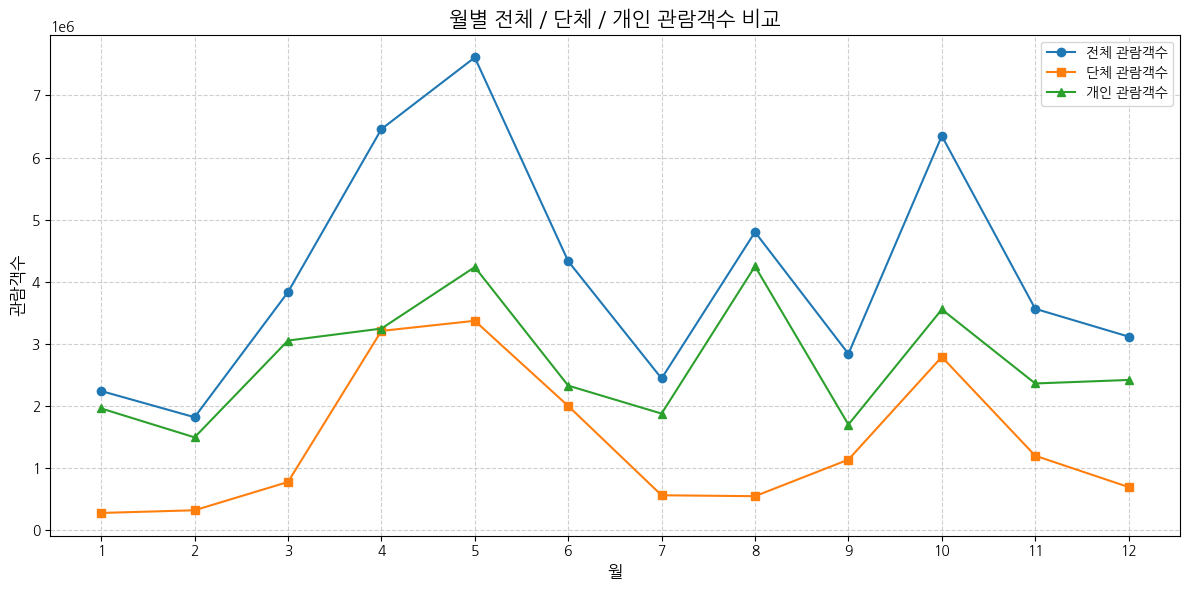

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(mon_total['월'], mon_total['관람객수'], marker='o', label='전체 관람객수')
plt.plot(mon_total['월'], mon_total['단체관람객수'], marker='s', label='단체 관람객수')
plt.plot(mon_total['월'], mon_total['개인관람객수'], marker='^', label='개인 관람객수')

plt.title('월별 전체 / 단체 / 개인 관람객수 비교', fontsize=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('관람객수', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### 3. 언론보도와 관람객수의 관계
- 언론보도가 긍정적이라면 관람객수가 증가하는가에 대한 유의미한 통계 확인

In [ ]:
df_announce = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 보훈공공데이터 공모전/데이터/독립기념관_언론보도자료 현황_20240722.csv', encoding = 'cp949')
df_announce

,관리번호,제목,언론사,언론사 구분,사용구분,등록일
0,31088,"독립기념관, 2021년 1월의 독립운동가 전시회 개최",내외뉴스통신,기타,Y,2021-01-01
1,31089,[신년사] 박상돈 천안시장,브레이크뉴스,기타,Y,2021-01-01
2,31090,[2021 신년사]박상돈 천안시장,뉴스프리존,기타,Y,2021-01-01
3,31091,"[박상돈 천안시장 신년사] ""무신불립(無信不立)""",충청뉴스,기타,Y,2021-01-01
4,31092,[2021 신년사] 양승조 충청남도 도지사,농축유통신문,기타,Y,2021-01-01
...,...,...,...,...,...,...
9344,40432,[신주백의 사연史淵]새로운 기념 하기,경향신문A,기타,Y,2024-07-15
9345,40433,[기고] 국보 영남루에서 피서를,경남도민일보,지역종합지,Y,2024-07-15
9346,40434,"상명대, 천안시 지역개발 공공디자인 제안",디트뉴스,기타,Y,2024-07-15
9347,40435,"[경인아고라] 역사를 잊은 민족, 민족을 잊은 역사",경인일보,지역종합지,Y,2024-07-15


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("alsgyu/sentiment-analysis-fine-tuned-model")
model = AutoModelForSequenceClassification.from_pretrained("alsgyu/sentiment-analysis-fine-tuned-model")
model.eval()

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        pred = torch.argmax(model(**inputs).logits, dim=1).item()
    return ['부정','중립','긍정'][pred]

df_announce['보도감성'] = df_announce['제목'].apply(predict_sentiment)


tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/250k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/722k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
df_announce[df_announce['보도감성'] == '중립']

,관리번호,제목,언론사,언론사 구분,사용구분,등록일,보도감성
3,31091,"[박상돈 천안시장 신년사] ""무신불립(無信不立)""",충청뉴스,기타,Y,2021-01-01,중립
10,31098,안익태가 친일파니 애국가 바꾸자 다르게 생각합니다,오마이뉴스언론사 선정,기타,Y,2021-01-02,중립
107,31195,"<현안 인터뷰-황기철>“독립·호국·민주, 어느 한쪽으로도 치우치지 않는 보...",문화일보,중앙지,Y,2021-01-28,중립
174,31262,국회의원 47명 '겸직 불가' 판정…'이해충돌방지법'은 차일파일,뉴스1,기타,Y,2021-02-10,중립
217,31305,젊은 감성 담은 지역 홍보 영상 중국서 '관심',충청투데이,지역종합지,Y,2021-02-23,중립
...,...,...,...,...,...,...,...
9233,40321,[말글물길 이야기] 川川히 燦燦히 국도 따라 강길 따라 안동을 가다,울산제일일보,기타,Y,2024-06-13,중립
9260,40348,"문익점 후손의 절개 ""나라 망하는 거 어떻게 앉아 보나""",오마이뉴스,기타,Y,2024-07-02,중립
9287,40375,덧붙이는 말,오마이뉴스,기타,Y,2024-07-05,중립
9288,40376,"[박동규의 정론직필] '리틀 노무현' 김두관의 당권 도전, '약' 될까 '독'될까",일요서울,기타,Y,2024-07-05,중립


In [ ]:
from transformers import pipeline

pipe = pipeline("text-classification", model="searle-j/kote_for_easygoing_people", top_k=None)

texts = df_announce['제목'].tolist()
results = pipe(texts, batch_size=16)

def extract_top_label(score_list):
    return max(score_list, key=lambda x: x['score'])['label']

df_announce['최고감성_kote'] = df_announce['보도감성_kote'].apply(extract_top_label)
df_announce

Device set to use cuda:0


,관리번호,제목,언론사,언론사 구분,사용구분,등록일,보도감성,연월,보도감성_kote,최고감성_kote
0,31088,"독립기념관, 2021년 1월의 독립운동가 전시회 개최",내외뉴스통신,기타,Y,2021-01-01,긍정,2021-01,"[{'label': '없음', 'score': 0.8956392407417297},...",없음
1,31089,[신년사] 박상돈 천안시장,브레이크뉴스,기타,Y,2021-01-01,긍정,2021-01,"[{'label': '없음', 'score': 0.9114416241645813},...",없음
2,31090,[2021 신년사]박상돈 천안시장,뉴스프리존,기타,Y,2021-01-01,긍정,2021-01,"[{'label': '없음', 'score': 0.8874883055686951},...",없음
3,31091,"[박상돈 천안시장 신년사] ""무신불립(無信不立)""",충청뉴스,기타,Y,2021-01-01,중립,2021-01,"[{'label': '없음', 'score': 0.8955351710319519},...",없음
4,31092,[2021 신년사] 양승조 충청남도 도지사,농축유통신문,기타,Y,2021-01-01,긍정,2021-01,"[{'label': '없음', 'score': 0.8441224098205566},...",없음
...,...,...,...,...,...,...,...,...,...,...
9344,40432,[신주백의 사연史淵]새로운 기념 하기,경향신문A,기타,Y,2024-07-15,긍정,2024-07,"[{'label': '없음', 'score': 0.9296995997428894},...",없음
9345,40433,[기고] 국보 영남루에서 피서를,경남도민일보,지역종합지,Y,2024-07-15,긍정,2024-07,"[{'label': '즐거움/신남', 'score': 0.79736244678497...",즐거움/신남
9346,40434,"상명대, 천안시 지역개발 공공디자인 제안",디트뉴스,기타,Y,2024-07-15,긍정,2024-07,"[{'label': '없음', 'score': 0.8880325555801392},...",없음
9347,40435,"[경인아고라] 역사를 잊은 민족, 민족을 잊은 역사",경인일보,지역종합지,Y,2024-07-15,긍정,2024-07,"[{'label': '비장함', 'score': 0.8401971459388733}...",비장함


In [ ]:
df_announce[df_announce['최고감성_kote'] != '없음']

,관리번호,제목,언론사,언론사 구분,사용구분,등록일,보도감성,연월,보도감성_kote,최고감성_kote
6,31094,[신년사] 박상돈 천안시장 “위기를 넘어 비상하는 천안”,시사뉴스24,기타,Y,2021-01-01,긍정,2021-01,"[{'label': '기대감', 'score': 0.8982093334197998}...",기대감
10,31098,안익태가 친일파니 애국가 바꾸자 다르게 생각합니다,오마이뉴스언론사 선정,기타,Y,2021-01-02,중립,2021-01,"[{'label': '의심/불신', 'score': 0.945056617259979...",의심/불신
11,31099,"장천 김성태 선생, 새해 경기신문 슬로건 '우직하게 일어나소' 작업",경기신문,기타,Y,2021-01-02,긍정,2021-01,"[{'label': '아껴주는', 'score': 0.7421104311943054...",아껴주는
12,31100,"박상돈 천안시장 신년사 ""2021년 우리는 할 수 있습니다""",금강일보,기타,Y,2021-01-02,긍정,2021-01,"[{'label': '기대감', 'score': 0.8061261177062988}...",기대감
13,31101,독립기념관 부패방지경영시스템 구제표준인증 획득,충청일보,지역종합지,Y,2021-01-03,긍정,2021-01,"[{'label': '기대감', 'score': 0.8243116140365601}...",기대감
...,...,...,...,...,...,...,...,...,...,...
9336,40424,"정부發 공공예식장·가격표시제, 웨딩 업계 구조 바꾸나",충청투데이,지역종합지,Y,2024-07-14,긍정,2024-07,"[{'label': '의심/불신', 'score': 0.752631366252899...",의심/불신
9341,40429,북한 회사가 건축한 독립기념관 건물이 있는 나라는,뉴시스,기타,Y,2024-07-15,긍정,2024-07,"[{'label': '의심/불신', 'score': 0.801547765731811...",의심/불신
9345,40433,[기고] 국보 영남루에서 피서를,경남도민일보,지역종합지,Y,2024-07-15,긍정,2024-07,"[{'label': '즐거움/신남', 'score': 0.79736244678497...",즐거움/신남
9347,40435,"[경인아고라] 역사를 잊은 민족, 민족을 잊은 역사",경인일보,지역종합지,Y,2024-07-15,긍정,2024-07,"[{'label': '비장함', 'score': 0.8401971459388733}...",비장함


In [ ]:
df_announce['최고감성_kote'].unique()

array(['없음', '기대감', '의심/불신', '아껴주는', '존경', '감동/감탄', '안타까움/실망', '깨달음',
       '비장함', '불평/불만', '안심/신뢰', '화남/분노', '불안/걱정', '당황/난처', '슬픔', '고마움',
       '어이없음', '기쁨', '증오/혐오', '즐거움/신남', '행복', '놀람', '신기함/관심', '짜증',
       '환영/호의', '한심함', '경악', '흐뭇함(귀여움/예쁨)', '절망', '불쌍함/연민'], dtype=object)

In [ ]:
# 재매핑 사전 만들기
sentiment_map = {
    '기쁨': '긍정', '행복': '긍정', '즐거움/신남': '긍정', '고마움': '긍정',
    '환영/호의': '긍정', '흐뭇함(귀여움/예쁨)': '긍정',

    '화남/분노': '부정', '짜증': '부정', '슬픔': '부정', '절망': '부정',
    '불안/걱정': '부정', '안타까움/실망': '부정', '불평/불만': '부정',
    '증오/혐오': '부정', '경악': '부정', '한심함': '부정',

    '없음': '중립', '놀람': '중립', '깨달음': '중립', '신기함/관심': '긍정',
    '기대감': '긍정', '어이없음': '부정', '의심/불신': '부정',
    '당황/난처': '부정', '아껴주는': '중립', '비장함': '긍정',
    '존경': '긍정', '안심/신뢰': '긍정', '불쌍함/연민': '긍정'
}

# 최고감정 뽑아서 매핑
def extract_top_label(score_list):
    return max(score_list, key=lambda x: x['score'])['label']

df_announce['kote_감정'] = df_announce['보도감성_kote'].apply(extract_top_label)
df_announce['감정라벨'] = df_announce['kote_감정'].map(sentiment_map)


In [ ]:
df_announce['등록일'] = pd.to_datetime(df_announce['등록일'])
df_announce['연월'] = df_announce['등록일'].dt.to_period('M')
sentiment_month = df_announce.groupby(['연월', '감정라벨']).size().unstack(fill_value=0).reset_index()

# 기존 관람 데이터랑 병합
monthly_sum['연월'] = monthly_sum['일자'].dt.to_period('M')
monthly_sum['연월'] = monthly_sum['일자']
df_final = pd.merge(monthly_sum, sentiment_month, on='연월', how='left')

df_final['감성점수'] = df_final['긍정'] - df_final['부정']

AttributeError: 'PeriodProperties' object has no attribute 'to_period'

In [ ]:
monthly_sum['연월'] = monthly_sum['일자']
df_final = pd.merge(monthly_sum, sentiment_month, on='연월', how='left')

df_final['감성점수'] = df_final['긍정'] - df_final['부정']

In [ ]:
import statsmodels.api as sm

# 독립변수 (감성점수), 종속변수 (관람객수)
df_reg = df_final.dropna(subset=['감성점수', '관람객수'])
X = sm.add_constant(df_reg['감성점수'])
y = df_reg['관람객수']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   관람객수   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7892
Date:                Tue, 24 Jun 2025   Prob (F-statistic):              0.380
Time:                        13:21:45   Log-Likelihood:                -531.30
No. Observations:                  43   AIC:                             1067.
Df Residuals:                      41   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.684e+04   2.31e+04      4.195      0.0